# Description
Hello, I'm ihsan,<br>
In this project, I will apply the artificial neural network model, which is one of the deep learning topics, to my data set. Firstly I will prepare the dataset for the model. I will implement the Artificial Neural Network (ANN) model in two different ways. In the first way, I will show the operation of the ANN model with step-by-step functions and then apply it to the data set. In the second way, I will apply the ANN model with the Keras library. I just started improving myself on deep learning and 
This is my second project on this topic. I will share our first project in this section. At the same time, I have projects about data science and machine learning, I will share them in this section.In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)



# Content <a id = "cont"></a>
- [Prapare Dataset For Artificial Neural Network (ANN)](#1)
- [Artificial Neural Network (ANN)](#2)
    - [Step by step Artificial Neural Network (ANN)](#aa1)
    - [L Layer Neural Network](#aa2)
- [CONCLUSION](#3)

# Prapare Dataset For Artificial Neural Network (ANN) <a id = "1"></a>
[Go Content](#cont) <br>
In this chapter, I will prepare the dataset for Artificial Neural Network. 

Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
from random import shuffle  
from tqdm import tqdm 
from PIL import Image

**Datasets**

In [2]:
Train_Cats = "../input/cat-and-dogs/dataset/training_set/cats"
Train_Dogs = "../input/cat-and-dogs/dataset/training_set/dogs"
Test_Cats = "../input/cat-and-dogs/dataset/test_set/cats"
Test_Dogs = "../input/cat-and-dogs/dataset/test_set/dogs"

An image within the Train dataset.

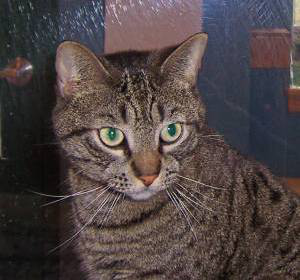

In [3]:
# Train cat image
Image.open("../input/cat-and-dogs/dataset/training_set/cats/cat.1.jpg")

An image within the test datase.

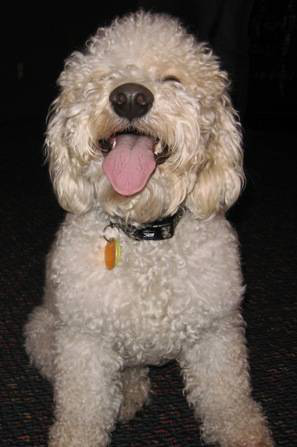

In [4]:
#test dog image
Image.open("../input/cat-and-dogs/dataset/test_set/dogs/dog.4003.jpg")

I convert images to gray format with "cv2.IMREAD_GRAYSCALE".

100%|██████████| 4000/4000 [00:32<00:00, 122.68it/s]


(-0.5, 127.5, 127.5, -0.5)

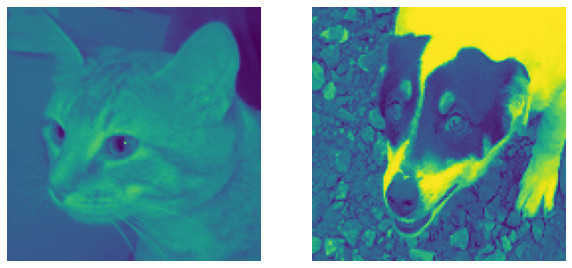

In [5]:
image_size = 128
for image1 in tqdm(os.listdir(Train_Cats)):
    path = os.path.join(Train_Cats, image1)
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img1, (image_size, image_size)).flatten()
    np_img1 = np.asarray(img1)
    
for image2 in tqdm(os.listdir(Train_Dogs)):
    path = os.path.join(Train_Dogs, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2 = np.asarray(img2)
    
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img1.reshape(image_size, image_size))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis("off")

I prepare the function for constitute to train_data and test_data.

In [6]:
def train_data():
    train_data_cats = []
    train_data_dogs = []
    
    for image1 in tqdm(os.listdir(Train_Cats)):
        path = os.path.join(Train_Cats, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_cats.append(img1)
        
    for image2 in tqdm(os.listdir(Train_Dogs)):
        path2 = os.path.join(Train_Dogs, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_dogs.append(img2)
        
    train_data = np.concatenate((np.asarray(train_data_cats), np.asarray(train_data_dogs)), axis = 0)
    
    return train_data

In [7]:
def test_data():
    test_data_cats = []
    test_data_dogs = []
    
    for image1 in tqdm(os.listdir(Test_Cats)): 
        path = os.path.join(Test_Cats, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_cats.append(img1)
        
    for image2 in tqdm(os.listdir(Test_Dogs)): 
        path2 = os.path.join(Test_Dogs, image2)
        img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_dogs.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_cats),np.asarray(test_data_dogs)),axis=0)
    
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 1000/1000 [00:07<00:00, 139.20it/s]


I combine the train_data and test_data that I prepared and I apply and normalize the dataset I have combined.

In [9]:
X_data = np.concatenate((train_data, test_data), axis = 0)
X_data = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))

I am preparing my dataset Y, which consists of zeros and ones.

In [10]:
z1 = np.zeros(4000)
o1 = np.ones(4000)
Y_train = np.concatenate((o1, z1), axis = 0)
z = np.zeros(1000)
o = np.ones(1000)
Y_test = np.concatenate((o, z), axis = 0)

In [11]:
Y_data = np.concatenate((Y_train, Y_test), axis = 0).reshape(X_data.shape[0],1)

In [12]:
print("X shape: ", X_data.shape)
print("Y shape: ", Y_data.shape)

X shape:  (10000, 128, 128)
Y shape:  (10000, 1)


Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.15, random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [14]:
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (8500, 16384)
X test flatten (1500, 16384)


In [15]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 8500)
x test:  (16384, 1500)
y train:  (1, 8500)
y test:  (1, 1500)


# Artificial Neural Network (ANN) <a id = "2"></a>
[Go Content](#cont) <br>

**What is the Artificial Neural Network (ANN)?** <br>
The term "Artificial neural network" refers to a biologically inspired sub-field of artificial intelligence modeled after the brain. An Artificial neural network is usually a computational network based on biological neural networks that construct the structure of the human brain. Similar to a human brain has neurons interconnected to each other, artificial neural networks also have neurons that are linked to each other in various layers of the networks. These neurons are known as nodes.<br>

For more explanation about ANN, [click here](https://www.javatpoint.com/artificial-neural-network)

## Step by step Artificial Neural Network (ANN) <a id="aa1"></a>
[Go Content](#cont)

In [16]:
# initialize parameters and layers sizes
# I arrange the weight and bias values.
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1" : np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1" : np.zeros((3,1)),
                 "weight2" : np.random.randn(y_train.shape[0], 3) *0.1,
                 "bias2" : np.zeros((y_train.shape[0],1))}
    return parameters

# Sigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# forward propagation
# I calculate variables z1,a1,z2,a2 using x_train.
# Z1 and A1 values are the first steps of the ANN model. 
# In the first step, I calculate Z1 and A1 values.
# In the second step, I calculate Z2 and A2 values.
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}
    
    return A2, cache

# compute cost
# I calculate error values.
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# backward propagation
# I do this step to update weight and bias values.
def backward_propagation_NN(parameters, cache, X, Y):
    
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    grads = {"dweight1" : dW1,
            "dbias1" : db1,
            "dweight2" : dW2,
            "dbias2" : db2}
    
    return grads

# update
# I update the weight and bias values.
def update_parameters_NN(parameters, grads, learning_rate):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                 "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                 "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"],
                 "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

# prediction
# I estimate in this step.
def predict_NN(parameters, x_test):
    
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

# Artificial Neural Network ANN
# I will use the functions I prepared inside this ANN function.
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations, learning_rate):
    cost_list = []
    index_list = []
    
    # initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)
        
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
        
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        
        # update parameters
        parameters = update_parameters_NN(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)
    
    # print
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 0.350279
Cost after iteration 100: 0.350740
Cost after iteration 200: 0.351228
Cost after iteration 300: 0.351580
Cost after iteration 400: 0.345622
Cost after iteration 500: 0.315794
Cost after iteration 600: 0.266056
Cost after iteration 700: 0.226792
Cost after iteration 800: 0.198367
Cost after iteration 900: 0.177164
Cost after iteration 1000: 0.162036
Cost after iteration 1100: 0.150581
Cost after iteration 1200: 0.141597
Cost after iteration 1300: 0.134481
Cost after iteration 1400: 0.128690
Cost after iteration 1500: 0.123914
Cost after iteration 1600: 0.120009
Cost after iteration 1700: 0.116871
Cost after iteration 1800: 0.114340
Cost after iteration 1900: 0.112269
Cost after iteration 2000: 0.110537
Cost after iteration 2100: 0.108974
Cost after iteration 2200: 0.107352
Cost after iteration 2300: 0.105569
Cost after iteration 2400: 0.104053


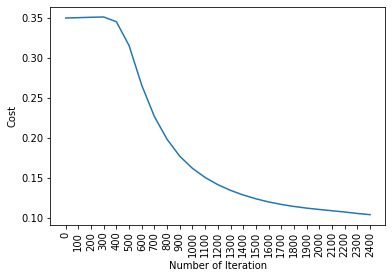

train accuracy: 89.78823529411764 %
test accuracy: 91.26666666666667 %


In [17]:
# Training chapter
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500, learning_rate = 0.01)

## L Layer Neural Network <a id = "aa2"></a>
[Go Content](#cont) <br>
In this step, I will use keras library. I will constitute a neural network with the Keras library.

In [18]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

**Artificial Neural Network (ANN) with Keras Library**

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu", input_dim = x_train.shape[1])) # 1. neural network
    classifier.add(Dense(units = 4, kernel_initializer = "uniform", activation = "relu")) # 2. neural network
    classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid")) # 3. neural network and last
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

2022-08-19 13:47:44.555573: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-19 13:47:45.625157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
178/178 [==============================] - 1s 3ms/step - loss: 0.5965 - accuracy: 0.8064
Epoch 2/100
178/178 [==============================] - 1s 3ms/step - loss: 0.5214 - accuracy: 0.8948
Epoch 3/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4918 - accuracy: 0.8957
Epoch 4/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4684 - accuracy: 0.8953
Epoch 5/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4459 - accuracy: 0.8939
Epoch 6/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8943
Epoch 7/100
178/178 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8938
Epoch 8/100
178/178 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8930
Epoch 9/100
178/178 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8904
Epoch 10/100
178/178 [==============================] - 1s 3ms/step - loss: 0.3798 - accura

# CONCLUSION <a id = "3"></a>
****
[Go Content](#cont) <br>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.